In [15]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('USA_Housing.csv')

In [17]:
df.drop(columns=['Address'], inplace = True)

In [18]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [19]:
X = df.drop(["Price"], axis = 1)
Y = df["Price"]

<h3>Scaling the Data (Normalize 0 ->1): </h3>

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.686822,0.441986,0.501502,0.464444,0.329942
1,0.683521,0.488538,0.464501,0.242222,0.575968
2,0.483737,0.468609,0.701350,0.695556,0.528582
3,0.506630,0.660956,0.312430,0.280000,0.491549
4,0.469223,0.348556,0.611851,0.495556,0.376988
...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.326351
4996,0.675097,0.633450,0.444024,0.448889,0.366362
4997,0.507135,0.670026,0.208534,0.028889,0.476515
4998,0.558419,0.420389,0.517579,0.764444,0.611282


<h3>Split the Data:</h3>

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=30)
m = len(X_train)


<h3>Implemented the Cost Function and Gradient Descent Function:</h3>

In [22]:
def cost(x, y, weights):
    pred = x.dot(weights)
    errors = np.subtract(pred, y)
    sqrErrors = np.square(errors)
    total_cost = (1 / (2 * m)) * np.sum(sqrErrors)
    return total_cost

In [59]:
def gradient_descent(x, y, weights, learning_rate, iterations):
    """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  x : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  weights : 1D array of fitting parameters or weights. Dimension (1 x n)
  learning_rate : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  weights : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Contains value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        pred = x.dot(weights)
        errors = np.subtract(pred, y)
        sum_delta = (learning_rate / m) * x.transpose().dot(errors)
        weights = weights - sum_delta
        cost_history[i] = cost(x, y, weights) 
    return weights, cost_history

<h3>Get the Weights using the train data:</h3>

In [60]:
weights = np.zeros(5)
iterations = 1000
learning_rate = 0.10
weights, cost_history = gradient_descent(X_train, Y_train, weights, learning_rate, iterations)

In [61]:
print('Final value of weights:\n',weights)


Final value of weights:
 Avg. Area Income                961099.244884
Avg. Area House Age             616090.476964
Avg. Area Number of Rooms       304643.331729
Avg. Area Number of Bedrooms      3425.495717
Area Population                 501587.989588
dtype: float64


<h3>Plot the Cost History:</h3>

Text(0.5, 1.0, 'Convergence of gradient descent')

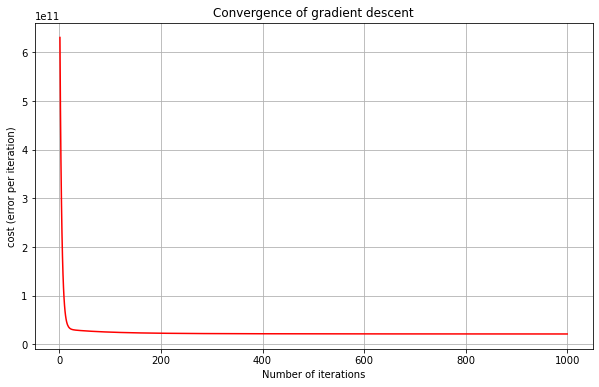

In [62]:
plt.plot(range(1, iterations +1), cost_history, color ='red')
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.ylabel("cost (error per iteration)")
plt.xlabel("Number of iterations")
plt.title("Convergence of gradient descent")

<h3>Use the Weights got from Gradient Descen to Predict:</h3>

In [67]:
def predict(x):
    return x.dot(weights)


prediction = predict(X_test)
error = cost(X_test, Y_test, weights)
print("cost: ", error)


cost:  351133807304.6752


<h3>Compare the Performance of Gradient Descent with different learning rates:</h3>

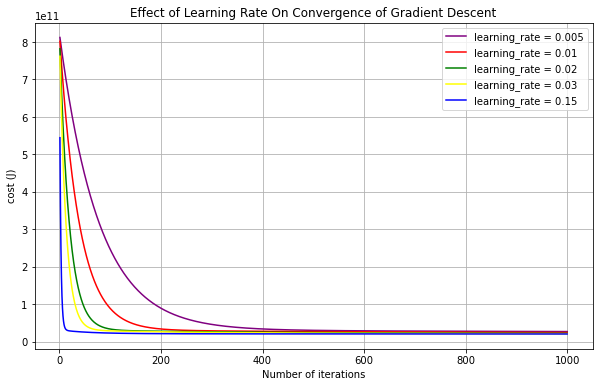

In [66]:
weights=np.zeros(5)
iterations=1000
learning_rate = 0.005
weights1, cost_history_1 = gradient_descent(X_train, Y_train, weights, learning_rate, iterations)

learning_rate = 0.01
weights2, cost_history_2 = gradient_descent(X_train, Y_train, weights, learning_rate, iterations)

learning_rate = 0.02
weights3, cost_history_3 = gradient_descent(X_train, Y_train, weights, learning_rate, iterations)

learning_rate = 0.03
weights4, cost_history_4 = gradient_descent(X_train, Y_train, weights, learning_rate, iterations)

learning_rate = 0.15
weights5, cost_history_5 = gradient_descent(X_train, Y_train, weights, learning_rate, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'learning_rate = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'learning_rate = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'learning_rate = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'learning_rate = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'learning_rate = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("Number of iterations")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()
